<a href="https://colab.research.google.com/github/cyberpunk-newman/Master/blob/main/BS6204/Lec_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio(input='/content/drive/MyDrive/banana_data/',
          output='/content/drive/MyDrive/output',
          seed=2021,
          ratio=(0.7,0.15,0.15))

Copying files: 450 files [03:13,  2.33 files/s]


In [ ]:
#import libraries
import keras
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.applications import mobilenet_v2,resnet,vgg16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


In [ ]:
base_model = mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False) #vgg16.VGG16, resnet.RESNET

#get base models layer
x=base_model.output

# add our layers
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)

preds=Dense(3,activation='softmax')(x)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
BATCH_SIZE=8

In [ ]:
# declare generators to introduce augment into traiing process
train_datagen=ImageDataGenerator(rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # no augmentation necessary

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/output/train',
                        target_size=(224,224),
                        color_mode='rgb',
                        batch_size=BATCH_SIZE,
                        class_mode='categorical',
                        shuffle=True)

Found 315 images belonging to 3 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/output/val',
                        target_size=(224,224),
                        color_mode='rgb',
                        batch_size=BATCH_SIZE,
                        class_mode='categorical',
                        shuffle=True)

Found 66 images belonging to 3 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory('/content/drive/MyDrive/output/test',
                        shuffle=False)

Found 68 images belonging to 3 classes.


In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,
         steps_per_epoch=train_generator.samples//BATCH_SIZE,
         validation_data=val_generator,
          validation_steps=val_generator.samples//BATCH_SIZE,
          epochs=20)

Epoch 1/20
39/39 [==============================] - 20s 358ms/step - loss: 1.0467 - accuracy: 0.5342 - val_loss: 0.7483 - val_accuracy: 0.6406
Epoch 2/20
39/39 [==============================] - 13s 323ms/step - loss: 0.5014 - accuracy: 0.8013 - val_loss: 0.7858 - val_accuracy: 0.6250
Epoch 3/20
39/39 [==============================] - 13s 322ms/step - loss: 0.3436 - accuracy: 0.8795 - val_loss: 0.7472 - val_accuracy: 0.6562
Epoch 4/20
39/39 [==============================] - 13s 321ms/step - loss: 0.2743 - accuracy: 0.9023 - val_loss: 1.0693 - val_accuracy: 0.6406
Epoch 5/20
39/39 [==============================] - 13s 321ms/step - loss: 0.2453 - accuracy: 0.9153 - val_loss: 0.7775 - val_accuracy: 0.7344
Epoch 6/20
39/39 [==============================] - 12s 304ms/step - loss: 0.1834 - accuracy: 0.9186 - val_loss: 1.0375 - val_accuracy: 0.6719
Epoch 7/20
39/39 [==============================] - 12s 310ms/step - loss: 0.2378 - accuracy: 0.9186 - val_loss: 0.3893 - val_accuracy: 0.8594

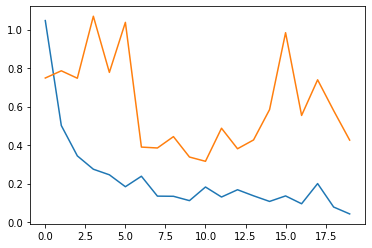

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
test_generator.classes # aplhabetical order:'green','overeripe','ripe'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
predictions=model.predict(test_generator)
predictions

array([[9.99981523e-01, 8.25467453e-07, 1.75964997e-05],
       [9.99987364e-01, 5.23092808e-07, 1.21448347e-05],
       [9.83017325e-01, 2.65891594e-03, 1.43236751e-02],
       [9.92492974e-01, 1.72005361e-03, 5.78700937e-03],
       [9.94330525e-01, 1.20804075e-03, 4.46138950e-03],
       [9.99670148e-01, 3.42755848e-05, 2.95579550e-04],
       [9.72932339e-01, 1.00322692e-02, 1.70354471e-02],
       [9.99988079e-01, 4.65850320e-07, 1.14526401e-05],
       [1.00000000e+00, 4.05221662e-10, 4.79395545e-08],
       [9.99999762e-01, 3.70572995e-09, 2.62873129e-07],
       [9.99900818e-01, 6.68503662e-06, 9.25139757e-05],
       [9.99921560e-01, 5.30033958e-06, 7.32457993e-05],
       [9.99896646e-01, 7.24923802e-06, 9.61151090e-05],
       [9.99963403e-01, 2.32392676e-06, 3.43480497e-05],
       [9.99962568e-01, 2.58064074e-06, 3.47709029e-05],
       [9.99997258e-01, 7.22301792e-08, 2.67993369e-06],
       [7.20033526e-01, 1.34013519e-01, 1.45952970e-01],
       [9.99482989e-01, 6.59707

In [ ]:
single_pred = np.argmax(predictions,axis=1)
single_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2])

In [ ]:
confusion_matrix(test_generator.classes,single_pred)

array([[22,  0,  0],
       [ 0, 19,  4],
       [ 3,  2, 18]])